# Estymatory największej wiarygodności

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy import optimize

# Zadanie 1
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami $\mu=1$, $\sigma=1$. 

In [2]:
N = 100000
u=stats.uniform()
data = u.rvs(size=N)
mu= 0
sigma = 1

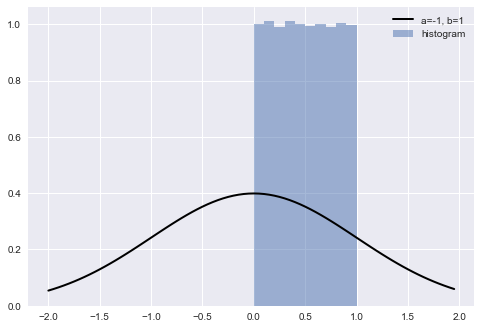

In [3]:
t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, normed=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

# Zadanie 2
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami 

<ul>
<li>$\mu=\frac{1}{n}\sum_{i=1}^n x_i$</li>
<li>$\sigma=\frac{1}{n} \sum_{i=1}^n(x_i - \mu)^2$</li>
</ul>

In [39]:
N = 100000
mu= np.mean(data) 
sigma = np.std(data,ddof=0)
mu, sigma

(0.49918124024813931, 0.28869196840147898)

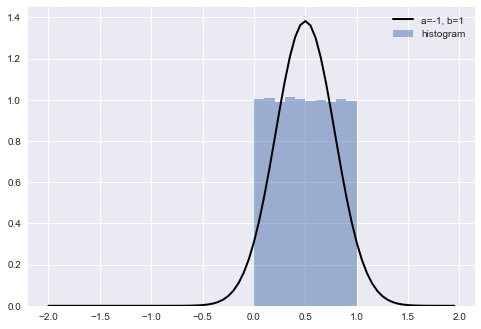

In [38]:
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, normed=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

# Zadanie 3
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami otrzymanymi za pomocą funkcji <tt>fit()</tt> ze <tt>scipy.stats</tt>

0.500411435197 0.291099020464


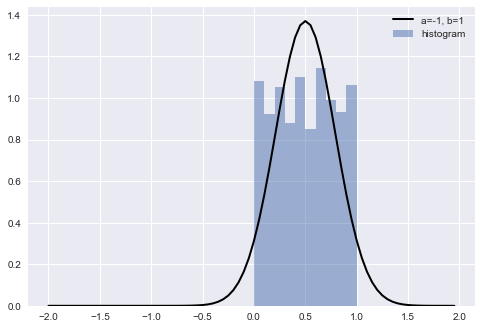

In [60]:
u=stats.uniform()
data = u.rvs(size=1000)

t = np.arange(-2, 2, 0.05)
N = 100000
mu, sigma = stats.norm.fit(data)

mu1, std1 = stats.norm.fit(data)
print(mu1, std1)
t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, normed=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t,mu1, std1), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

# Zadanie 4

Wiemy, że funkcję wiarygodnosci ma postać:
$$
L(X,m,\sigma)=\prod\limits_{i=1}^n f_{m,\sigma} (x_i).
$$


Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziany rozkładów normalnych:
$$
l(X,m,\sigma)=\ln\left( L(X,m,\sigma) \right)=\ln\left(\prod\limits_{i=1}^n f_{m,\sigma} (x_i) \right)=\sum\limits_{i=1}^n \ln(f_{m,\sigma} (x_i))
$$

In [40]:
# split normal distribution pdf
def Gpdf(x, mu, sigma):
    return 1/(sigma * (2*np.pi)**.5) *np.e ** (-(x-mu)**2/(2 * sigma**2))

In [41]:
def mle(x):
    m, sigma = x
    s = 0
    for i in range(data.size):
        s += np.log( Gpdf(data[i], m, abs(sigma)) )
    return -1*s

# Zadanie 5
Policz MLE dal danych z rozkłdu jednostajnego i parametrów:
<ul>
<li>$\mu=0$, $\sigma=1$</li>
<li>$\mu=0$, $\sigma=2$</li>
<li>$\mu=1$, $\sigma=1$</li>
<li>$\mu=0.5$, $\sigma=0.2$</li>
</ul>
Dla których wartości wychodzi wynik największy i dlaczego?

In [42]:
x0 = np.asarray((0, 1))
print(mle(x0))
x0 = np.asarray((0, 2))
print(mle(x0))
x0 = np.asarray((1, 1))
print(mle(x0))
x0 = np.asarray((0.5, 0.2))
print(mle(x0))

108520.101482
165365.133417
108601.977457
35129.7158109


# Zadanie 6
Zapoznaj się z funkcją <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html
i znajdż minum funkcji

$$
f(x,y) = (x+1)^2+y^2
$$

In [43]:
def f(x):
    x1, x2 = x
    return (x1+1)**2+(x2)**2
x0 = np.asarray((0, 0))
res1 = optimize.fmin_cg(f, x0)
res1

         Current function value: 0.000100
         Iterations: 1
         Function evaluations: 20
         Gradient evaluations: 2


array([ -1.01000000e+00,  -7.52508635e-09])

# Zadanie 7
Zminimalizuj funkcją wiarygodności z Zad. 5 (numerycznie).

Czy wyniki są podobne do wyniików z poprzednich zadań?

In [44]:
x0 = np.asarray((0, 1))
min_value = optimize.fmin_cg(mle, x0)
print(min_value)

         Current function value: 17654.352063
         Iterations: 12
         Function evaluations: 148
         Gradient evaluations: 34
[ 0.49918123  0.28869196]


In [45]:
mu= min_value[0]
sigma = np.abs(min_value[1])

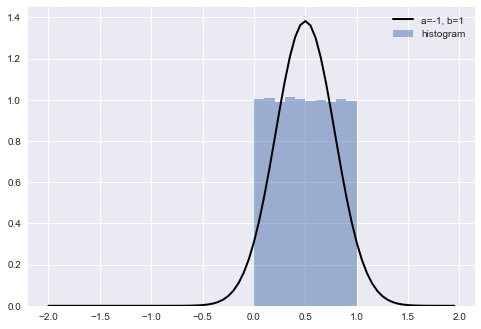

In [46]:
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, normed=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

# Zadanie 8 (dla chętnych)
Wykonaj poprzednie zadanie wykorzystując pochodne http://faculty.washington.edu/ezivot/econ583/mleLectures.pdf.

# Zadanie 9
Napisz funkcję gęstości rozkładu Split Gaussian:

$$
SN(x;m,\sigma^2,\tau^2) = \left\{ \begin{array}{ll}
c \cdot \exp[-\frac{1}{2\sigma^2}(x-m)^2], & \textrm{for $x\leq m$},\\
c \cdot \exp[-\frac{1}{2\tau^2\sigma^2}(x-m)^2], & \textrm{for $x>m$},\\
\end{array} \right.
$$

gdzie $c=\sqrt{\frac{2}{\pi}}\sigma^{-1}(1+\tau)^{-1}$.

Narysuj gęstości dla parametrów:

<ul>
<li>$\mu=0$, $\sigma=1$, $\tau=1$</li>
<li>$\mu=0$, $\sigma=1$, $\tau=1/2$</li>
<li>$\mu=1$, $\sigma=1/2$, $\tau=1$</li>
</ul>

In [57]:
def SGpdf(x, mu, sigma, tau):
    c = (np.sqrt(2/np.pi))/(sigma+tau)
    if x < mu:
        z = c * np.exp(-(x-mu)*(x-mu) / (2*sigma*sigma))
    else:
        z = c * np.exp(-(x-mu)*(x-mu) / (2*tau*tau))
    return z

In [48]:
SGpdf_vec = np.vectorize(SGpdf)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


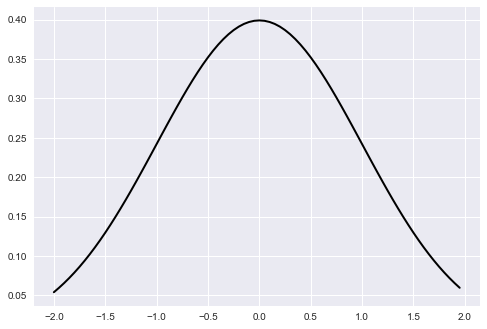

In [50]:
t = np.arange(-2, 2, 0.05)
fig, ax = plt.subplots(1, 1)
ax.plot(t, SGpdf_vec(t, 0 ,1, 1), 'k-', lw=2)
ax.legend()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


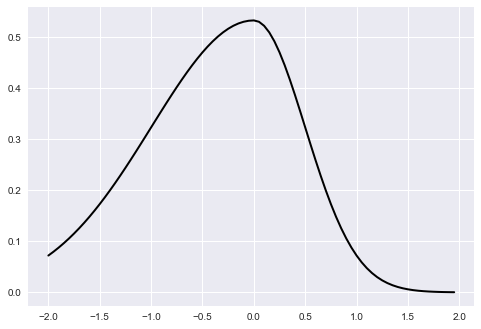

In [51]:
t = np.arange(-2, 2, 0.05)
fig, ax = plt.subplots(1, 1)
ax.plot(t, SGpdf_vec(t, 0 ,1, 1/2), 'k-', lw=2)
ax.legend()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


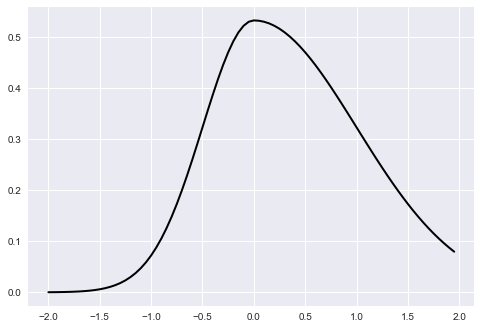

In [52]:
t = np.arange(-2, 2, 0.05)
fig, ax = plt.subplots(1, 1)
ax.plot(t, SGpdf_vec(t, 0 ,1/2, 1), 'k-', lw=2)
ax.legend()
plt.show()

# Zadanie 10

Wiemy, że funkcję wiarygodnosci ma postać:
$$
L(X,m,\sigma,\tau)=\prod\limits_{i=1}^n f_{m,\sigma,\tau} (x_i).
$$


Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziany rozkładów Split Normal:
$$
l(X,m,\sigma,\tau)=\ln\left( L(X,m,\sigma,\tau) \right)=\ln\left(\prod\limits_{i=1}^n f_{m,\sigma,\tau} (x_i) \right)=\sum\limits_{i=1}^n \ln(f_{m,\sigma,\tau} (x_i))
$$

In [62]:
def SG_mle(x):
    m, sigma, tau = x
    s = 0
    for i in range(data.size):
        s += np.log( SGpdf(data[i], m, abs(sigma), abs(tau)) )
    return -1*s

# Zadanie 11
Zminimalizuj funkcją wiarygodności z Zad. 10 (numerycznie).

In [63]:
x0 = np.asarray((0, 1, 1))
min_value = optimize.fmin_cg(SG_mle, x0)
print(min_value)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:628: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


         Current function value: 182.580554
         Iterations: 35
         Function evaluations: 644
         Gradient evaluations: 126
[ 0.66908084  0.38847503  0.19240511]


# Zadanie 12
Zaiportuj dane <tt>datasets</tt> i wyestymuj rozkład normalny i Split Normla dla <tt>boston.data[:,7]</tt>.

Rozpocznij procedurę minimalizacji od warunku początkowego:

<ul>
<li>mu=np.mean(data)</li>
<li>sigma=np.std(data)</li>
<li>tau=np.std(data)</li>
</ul>

Który rozkład lepiej pasuje do danych?

In [26]:
from sklearn import datasets
boston = datasets.load_boston()
data=boston.data[:,7]